In [1]:
##################################
### Import the usual libraries ###
##################################

import numpy as np

import astropy
from astropy.io import fits, ascii
from astropy.table import Table, Column
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import astropy.constants as const
import astropy.units as u

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16}) #make plots more readable

import MagellanicStream as ms

import dlnpyutils

import age_functions as afunc

from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')

In [3]:
#########################
### Import fits files ###
#########################

#isochrone website http://stev.oapd.inaf.it/cgi-bin/cmd
''' Ages used 8 to 10.1 steps 0.15'''
''' Metallicity used -2.6 to 0.1 steps 0.099'''

parsecall = ascii.read('/Users/joshpovick/Desktop/Research/Magellanic_Ages/logisochrones.dat', \
                    format='basic', delimiter='\s')

rgb = np.where(parsecall['label']==3)
rgb_iso = parsecall[rgb]

agb = np.where((parsecall['label']!=0)&(parsecall['label']!=1)&(parsecall['label']!=2)&(parsecall['label']!=3)&
               (parsecall['label']!=9))
agb_iso = parsecall[agb]

#DR16
r13 = fits.getdata('lmc_rgbmembers.r13-l33-58672.fits',1)
clnr = np.where((r13['FE_H']>-9999.0)&(r13['AK_TARG']>-9999.0)&(r13['LOGG']>0.0)&(r13['M_H_ERR']>-90.0)&
                (r13['C_FE']>-9999.0)&(r13['N_FE']>-9999.0))

r13 = r13[clnr]

# #old dr16
# olddr16 = fits.getdata('/Users/joshpovick/Desktop/Research/Magellanic_Ages/lmc_rgbmembersdist_dr16beta.fits.gz',1)
# clnrold = np.where((olddr16['FE_H']>-9999.0)&(olddr16['AK_TARG']>-9999.0)&(olddr16['LOGG']>0.0)&\
#                 (olddr16['M_H_ERR']>-90.0)&(olddr16['C_FE']>-9999.0)&(olddr16['N_FE']>-9999.0))

# clnrolddr16 = olddr16[clnrold]

# #Diane Feuillet
# pdfout = fits.getdata('/Users/joshpovick/Desktop/Research/Magellanic_Ages/LMC_DR16_all_PDF.fits.gz', 1)
# clnpdfout = pdfout[ np.where((olddr16['FE_H']>-9999.0)&(olddr16['AK_TARG']>-9999.0)&(olddr16['LOGG']>0.0)&\
#                 (olddr16['M_H_ERR']>-90.0)&(olddr16['C_FE']>-9999.0)&(olddr16['N_FE']>-9999.0))]

# #Read in Christian's Model
# Chrismod = ascii.read('/Users/joshpovick/Desktop/Research/Magellanic_Ages/abparam16_delgau1.5_1525.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'lmc_rgbmembers.r13-l33-58672.fits'

In [ ]:
############################################
### Create a list of all possible models ###
############################################

import itertools as it


### RGB Stars ###

rT = rgb_iso['logTe']
rK = rgb_iso['Ksmag']
rf = np.log10(rgb_iso['Zini']/0.02)
rg  = rgb_iso['logg']
rTK = np.multiply(rT,rK)
rTf = np.multiply(rT,rf)
rTg = np.multiply(rT,rg)
rKf = np.multiply(rK,rf)
rKg = np.multiply(rK,rg)
rfg = np.multiply(rf,rg)
rTsq = rT**2
rKsq = rK**2
rfsq = rf**2
rgsq = rg**2

rmod = []
rmod_str = []
rvar_str = ['rT','rK','rf','rg','rTK','rTf','rTg','rKf','rKg','rfg','rTsq','rKsq','rfsq','rgsq']
rvar = [rT,rK,rf,rg,rTK,rTf,rTg,rKf,rKg,rfg,rTsq,rKsq,rfsq,rgsq]
for i in range(4, len(rvar)+1):
    for subset in it.combinations(rvar,i):
        rmod.append(subset)
    for subset_str in it.combinations(rvar_str,i):
        rmod_str.append(np.array(subset_str))
    
# ridx = []
# for j in range(len(rmod_str)):
#     if rmod_str[j][0]=='rT' and rmod_str[j][1]=='rK' and rmod_str[j][2]=='rf' and rmod_str[j][3]=='rg':
#         ridx.append(j)
        
# rmod = np.array(rmod)[ridx]
# rmod_str_good = np.array(rmod_str)[ridx]

### AGB Stars ###

# aT = agb_iso['logTe']
# aK = agb_iso['Ksmag']
# af = np.log10(agb_iso['Zini']/0.02)
# ag  = agb_iso['logg']
# aTK = np.multiply(aT,aK)
# aTf = np.multiply(aT,af)
# aTg = np.multiply(aT,ag)
# aKf = np.multiply(aK,af)
# aKg = np.multiply(aK,ag)
# afg = np.multiply(af,ag)
# aTsq = aT**2
# aKsq = aK**2
# afsq = af**2
# agsq = ag**2

# amod = []
# amod_str = []
# avar_str = ['aT','aK','af','ag','aTK','aTf','aTg','aKf','aKg','afg','aTsq','aKsq','afsq','agsq']
# avar = [aT,aK,af,ag,aTK,aTf,aTg,aKf,aKg,afg,aTsq,aKsq,afsq,agsq]
# for i in range(4, len(avar)+1):
#     for subset in it.combinations(avar,i):
#         amod.append(subset)
#     for subset_str in it.combinations(avar_str,i):
#         amod_str.append(np.array(subset_str))
    
# aidx = []
# for j in range(len(amod_str)):
#     if amod_str[j][0]=='aT' and amod_str[j][1]=='aK' and amod_str[j][2]=='af' and amod_str[j][3]=='ag':
#         aidx.append(j)
        
# amod = np.array(amod)[aidx]
# amod_str_good = np.array(amod_str)[aidx]

In [ ]:
######################
### Fit All Models ###
######################

import statsmodels.api as sm 

### RGB Model ###

rmod_mads = []
rmod_params = []
rmod_res = []
for i in tqdm_notebook(range(len(rmod)),desc='Done?'):
    pmodl = np.array(rmod[i]).T
    pmodl = sm.add_constant(pmodl)
    model = sm.OLS(rgb_iso['logAge'],pmodl).fit()
    predictions = model.predict(pmodl)
    residual = predictions - rgb_iso['logAge']
    rmod_res.append(max(np.absolute(residual)))
    rmod_mads.append(afunc.mad(residual))
    rmod_params.append(np.asarray(model.params))
    
plt.figure(figsize=[10,10])
plt.hist(rmod_mads,density=True)
plt.xlabel(r'Median Absolute Deviation',fontsize=20)
plt.ylabel(r'Normalized Density',fontsize=20)
plt.title(r'RGB MAD Distribution',fontsize=20)
# plt.savefig('mad_dist.pdf',bbox_inches='tight')
plt.show()
    
rbest = np.where(rmod_mads == min(rmod_mads))
print(min(rmod_mads))
print(rmod_str_good[rbest])
print(np.asarray(rmod_params)[rbest])

### AGB Model ###

# amod_mads = []
# amod_params = []
# amod_res = []
# for i in range(len(amod)):
#     pmodl = np.array(amod[i]).T
#     pmodl = sm.add_constant(pmodl)
#     model = sm.OLS(agb_iso['logAge'],pmodl).fit()
#     predictions = model.predict(pmodl)
#     residual = predictions - agb_iso['logAge']
#     amod_res.append(max(np.absolute(residual)))
#     amod_mads.append(afunc.mad(residual))
#     amod_params.append(np.asarray(model.params))
    
# plt.figure(figsize=[10,10])
# plt.hist(amod_mads,density=True)
# plt.xlabel(r'Median Absolute Deviation',fontsize=20)
# plt.ylabel(r'Normalized Density',fontsize=20)
# plt.title(r'AGB MAD Distribution',fontsize=20)
# # plt.savefig('mad_dist.pdf',bbox_inches='tight')
# plt.show()
    
# abest = np.where(amod_mads == min(amod_mads))
# print(min(amod_mads))
# print(amod_str_good[abest])
# print(np.asarray(amod_params)[abest])

In [49]:
rbest = np.where(rmod_mads == min(rmod_mads))
rbest
print(min(rmod_mads))
print(np.asarray(rmod_str)[rbest])
print(np.asarray(rmod_params)[rbest])

0.007719599592830306
[array(['rK', 'rf', 'rg', 'rTK', 'rTf', 'rKf', 'rKg', 'rfg', 'rKsq',
       'rfsq', 'rgsq'], dtype='<U4')]
[array([ 2.52621329e+01,  4.62532862e+00,  3.53351883e+00, -6.98703679e+00,
       -4.56460648e-01, -9.70798165e-01, -1.57955999e-02, -5.44828708e-01,
        8.13818841e-02,  1.18727913e-01,  3.32421770e-02,  6.48246352e-01])]


In [53]:
#########################
### Find lowest order ###
#########################

### RGB Parsimonious ###

rsmall = np.where(np.asarray(rmod_mads)<=0.01)

rterms = []
for i in range(len(np.asarray(rmod_str)[rsmall])):
    rterms.append(len(np.asarray(rmod_str)[rsmall][i]))
    
print(rterms)
for j in range(7):
    print(np.asarray(rmod_str)[rsmall][j])
    
# ### AGB Parsimonious ###
    
# asmall = np.where(np.asarray(amod_mads)<=0.07)

# aterms = []
# for i in range(len(amod_str_good[asmall])):
#     aterms.append(len(amod_str_good[asmall][i]))
    
# print(aterms)
# for j in range(2):
#     print(amod_str_good[rsmall][j])

[7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,

In [54]:
###############################
### Fit Parsimonious Models ###
###############################

### RGB Model ###

rparsimonious = np.array([rT,rK,rTg,rKg,rTsq,rKsq,rgsq]).T
rparsimonious = sm.add_constant(rparsimonious)
rparsimonious_model = sm.OLS(rgb_iso['logAge'],rparsimonious).fit()
rparsimonious_predictions = rparsimonious_model.predict(rparsimonious)
rparsimonious_residual = rparsimonious_predictions - rgb_iso['logAge']
rparsimonious_summary = rparsimonious_model.summary()
print(rparsimonious_summary)
print(np.asarray(rparsimonious_model.params))

### AGB Model ###

# aparsimonious = np.array([aT,aK,af,ag,aTg,aKg,afg,aKsq,agsq]).T
# aparsimonious = sm.add_constant(aparsimonious)
# aparsimonious_model = sm.OLS(agb_iso['logAge'],aparsimonious).fit()
# aparsimonious_predictions = aparsimonious_model.predict(aparsimonious)
# aparsimonious_residual = aparsimonious_predictions - agb_iso['logAge']
# aparsimonious_summary = aparsimonious_model.summary()
# print(aparsimonious_summary)
# print(np.asarray(aparsimonious_model.params))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.682e+06
Date:                Wed, 18 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:35:28   Log-Likelihood:                 43746.
No. Observations:               16121   AIC:                        -8.748e+04
Df Residuals:                   16113   BIC:                        -8.742e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        123.6173      0.970    127.401      0.0

In [58]:
##################
### Age Models ###
##################

#[rT,rK,rf,rg,rTg,rKg,rfg,rKsq,rgsq]

# def rgb_age(teff,k,feh,lgg):
#     p = [ 2.34865658e+01,7.73561422e-01,3.31229224e+00,-3.92253575e-02,-4.71932940e+00,-8.67142123e-01,
#          -6.83193259e-01,1.93831669e-02,1.39372987e-01,8.31208860e-01]
#     age = p[0] + p[1]*teff + p[2]*k +p[3]*feh + p[4]*lgg + p[5]*np.multiply(teff,lgg) + p[6]*np.multiply(k,lgg) 
#     + p[7]*np.multiply(feh,lgg) + p[8]*np.square(k) + p[8]*np.square(lgg)
#     return age
    
# #[aT,aK,af,ag,aTg,aKg,afg,aKsq,agsq]
    
# def agb_age(teff,k,feh,lgg):
#     p = [ 2.11763415e+01,-2.55087921e+00,3.14273688e-01,-7.25101992e-02,-8.50581103e+00,3.06526653e+00,
#          3.63722985e-01,9.39541518e-02,-1.54465062e-02,-1.14795828e+00]
#     age = p[0] + p[1]*teff + p[2]*k +p[3]*feh + p[4]*lgg + p[5]*np.multiply(teff,lgg) + p[6]*np.multiply(k,lgg)
#     + p[7]*np.multiply(feh,lgg) + p[8]*np.square(k) + p[8]*np.square(lgg)
#     return age

#[rT,rK,rTg,rKg,rTsq,rKsq,rgsq]

def rgb_age(lteff,k,feh,lgg):
    p = [123.61730365,-56.35070573,3.30682966,-2.23150878,-0.68628097,8.15317541,0.13729609,0.89555452]
    age = p[0] + p[1]*lteff + p[2]*k + p[3]*np.multiply(lteff,lgg) + p[4]*np.multiply(k,lgg) + \
    p[5]*np.square(lteff) + p[6]*np.square(k) + p[7]*np.square(lgg)
    return age

In [59]:
######################
### Calculate Ages ###
######################

abd = {'C':8.39,'N':7.78,'O':8.66,'Mg':7.53,'Ca':6.31,'S':7.14,'Si':7.51,'Fe':7.45}
keys = list(abd.keys())

sol_2_H = []
for i in keys:
    sol_2_H.append(abd[i]-12.0)
    
sol_xm  = 10**np.asarray(sol_2_H)/sum(10**np.asarray(sol_2_H))
x_C = []
x_N = []
x_O = []
x_Mg = []
x_Ca = []
x_S = []
x_Si = []
x_Fe = []

for i in range(len(r13)):
    x_C.append(sol_xm[0]*10**(r13['C_FE']+r13['FE_H']-r13['M_H']))
    x_N.append(sol_xm[1]*10**(r13['N_FE']+r13['FE_H']-r13['M_H']))
    x_O.append(sol_xm[2]*10**(r13['O_FE']+r13['FE_H']-r13['M_H']))
    x_Mg.append(sol_xm[3]*10**(r13['Mg_FE']+r13['FE_H']-r13['M_H']))
    x_Ca.append(sol_xm[4]*10**(r13['Ca_FE']+r13['FE_H']-r13['M_H']))
    x_S.append(sol_xm[5]*10**(r13['S_FE']+r13['FE_H']-r13['M_H']))
    x_Si.append(sol_xm[6]*10**(r13['SI_FE']+r13['FE_H']-r13['M_H']))
    x_Fe.append(sol_xm[7]*10**(r13['FE_H']-r13['M_H']))
    
facts = []
factsalp = []
factsCNO = []
factsCN = []
factsCO = []
for j in range(len(r13)):
    numerCN = x_C[j]+x_N[j]
    denomCN = sum(sol_xm[0:2])
    
    numerCO = x_C[j]+x_O[j]
    denomCO = sol_xm[0]+sol_xm[2]
factsCN.append(numerCN/denomCN)
factsCO.append(numerCO/denomCO)
    
# factsCN = factsCN[0]
# factsCO = factsCO[0]

metscorr = np.log10(0.638*(np.asarray(factsCN)+0.362))

_, _, stardist = afunc.LMCdisk_cart(r13['RA'],r13['DEC'])
corabsK = afunc.absmag(r13['K'],stardist)-r13['AK_TARG']

rgbage = rgb_age(np.log10(r13['TEFF']),corabsK,afunc.sal(r13['M_H'],metscorr),r13['LOGG'])
rgbage = np.squeeze(rgbage)

# agbage = agb_age(np.log10(r13['TEFF']),corabsK,afunc.sal(r13['M_H'],metscorr),r13['LOGG'])
# agbage = np.squeeze(agbage)

In [ ]:
agegyr = 10**rgbage

plt.hist(10**rgbage,range(0,14*10**9))
# plt.xscale('log')
# plt.xlim(0,15)
# plt.show()
# plt.hist(10**agbage/10**9)
# plt.show()

In [36]:
min((10**rgbage)/10**9)

1.0977428434578508e-14

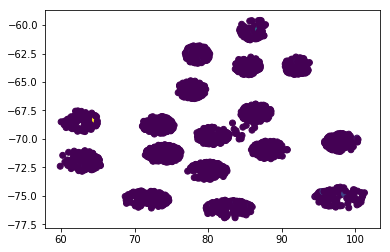

In [42]:
plt.scatter(r13['RA'],r13['DEC'],c=((10**rgbage)/10**9),vmin=0,vmax=1)